# This is our initial baseline model
Also to see if the dark images have (JPG only) really have any information.
If this method could get it, the DL way will surly do better.

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import rawpy
current_dir = '/media/sudhar/D Drive/Spider/Dark-sight/Dark-Sight/Image Enhancement Baselines'

In [18]:
def plot_hist(img):
    """
    Plots the histogram of an RGB image in all the channels
    
    :param img: Input image
    """
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

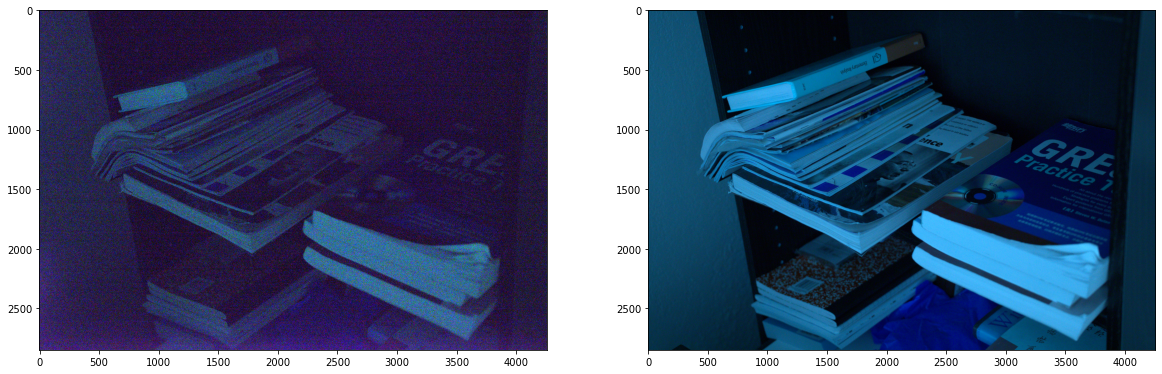

In [26]:
dataset_no = 'S2'
short_path = os.path.join(
            current_dir,
            os.path.join("dataset/" + str(dataset_no), str(dataset_no) ),
            )
long_path = os.path.join(
            current_dir,
            os.path.join("dataset/" + str(dataset_no), str(dataset_no) ),
            )
if type(dataset_no) is str:
    #Read short exposure RAW file
    raw = rawpy.imread(short_path + ".ARW") # access to the RAW image
    rgb = raw.postprocess() # a numpy RGB array
    short = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) 
    
    #Read short exposure RAW file
    raw = rawpy.imread(long_path + "_high.ARW") # access to the RAW image
    rgb = raw.postprocess() # a numpy RGB array
    long = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) 

else:
    short = plt.imread(short_path + ".JPG")
    long = plt.imread(long_path + "_high.JPG")
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax[0].imshow(short)
ax[1].imshow(long)

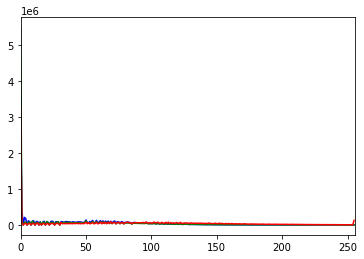

In [20]:
plot_hist(short)

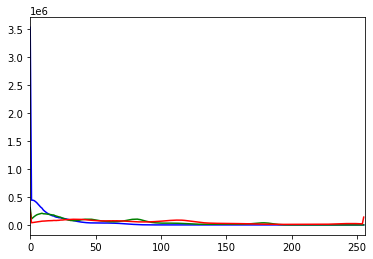

In [21]:
plot_hist(long)

In [22]:
def equalize_hist(img):
    """
    Runs the equalizeHist over each channel and cats them
    for output
    
    :param img: Input image of RGB format
    """
    res = []
    for channel in np.dsplit(img, img.shape[-1]):
        res.append(cv2.equalizeHist(channel))
    res = np.dstack(res)
    plt.imshow(res)
    return res

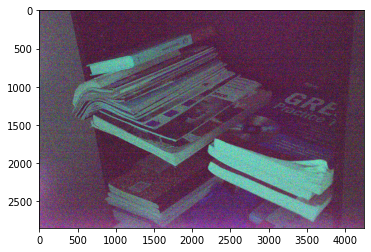

In [23]:
short_eq = equalize_hist(short)

# CLAHE Algorithm 
Best result.
Gaussian and bilateral filters with tuned params applied after CLAHE.

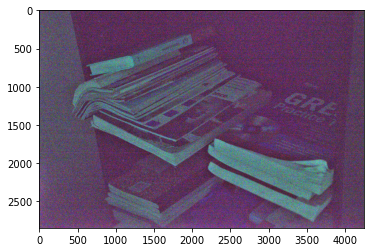

In [24]:
from clahe import clahe

op = clahe(short)  
plt.imshow(op)